In [15]:
import os
import pandas as pd

In [11]:
_CURRENT_ROOT = os.getcwd()  # root of current file
_PROJECT_ROOT = os.path.dirname(_CURRENT_ROOT)  # root of src
_PATH_DATA = os.path.join(_PROJECT_ROOT, "data/raw/")  # root of data folder

In [20]:
df=pd.read_csv(os.path.join(_PATH_DATA,'Corona_NLP_train.csv'),encoding='latin-1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


Scope of this project: tweet i label

In [22]:
df=df.iloc[:,-2:]
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [24]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

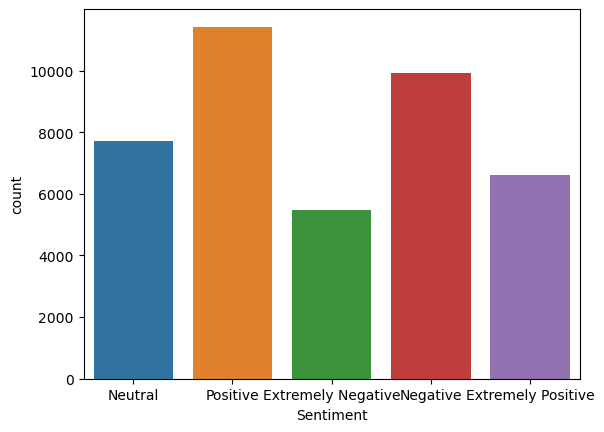

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Sentiment', data=df);plt.show()

In [31]:
df['word_count'] = df['OriginalTweet'].str.split().apply(len)
df['word_count'].describe()

count    41157.000000
mean        30.500304
std         11.591172
min          1.000000
25%         21.000000
50%         32.000000
75%         40.000000
max         64.000000
Name: word_count, dtype: float64

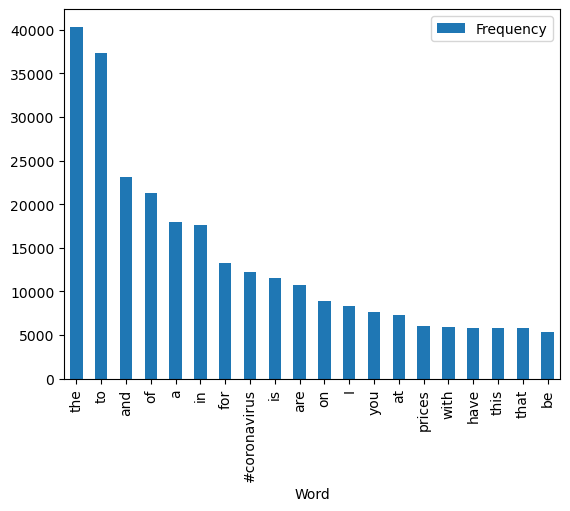

In [33]:
from collections import Counter

all_words = ' '.join([text for text in df['OriginalTweet']])
counter = Counter(all_words.split())
most_occur = counter.most_common(20)
df_most_occur = pd.DataFrame(most_occur, columns = ['Word', 'Frequency'])
df_most_occur.plot.bar(x = 'Word', y = 'Frequency');plt.show()

In [35]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 7.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


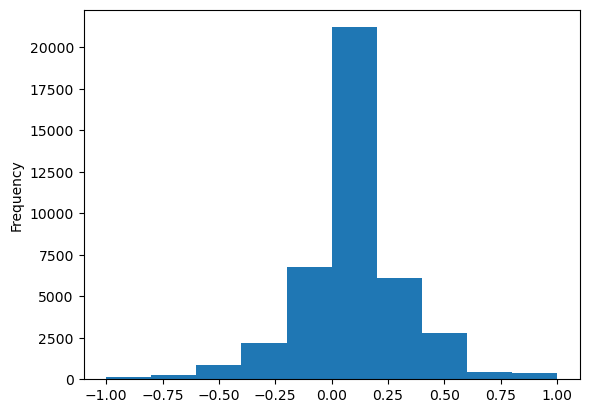

In [37]:
from textblob import TextBlob

df['Sentiment'] = df['OriginalTweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['Sentiment'].plot(kind='hist');plt.show()

In [41]:
!pip show textblob
!pip show wordcloud

Name: textblob
Version: 0.17.1
Summary: Simple, Pythonic text processing. Sentiment analysis, part-of-speech tagging, noun phrase parsing, and more.
Home-page: https://github.com/sloria/TextBlob
Author: Steven Loria
Author-email: sloria1@gmail.com
License: MIT
Location: /Users/lluiscolomercoll/opt/anaconda3/lib/python3.9/site-packages
Requires: nltk
Required-by: 
Name: wordcloud
Version: 1.8.2.2
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: /Users/lluiscolomercoll/opt/anaconda3/lib/python3.9/site-packages
Requires: matplotlib, numpy, pillow
Required-by: 


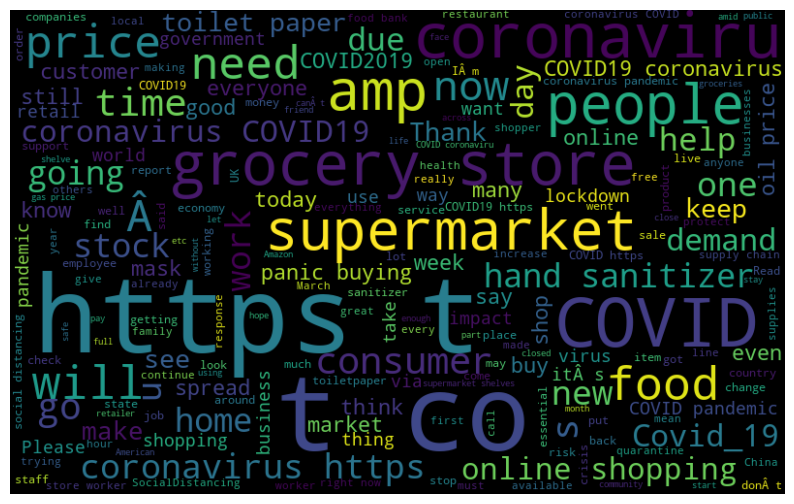

In [40]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['OriginalTweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()